<img src="https://raw.githubusercontent.com/marciolws/EBAC_EXERCICIOS/main/EBAC-media-utils/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Projeto 2** | Previsão de renda

Aluno [Marcio da Silva](https://github.com/marciolws)<br>
Data: 17 de Agosto de 2024.

---

# <div style="text-align:center"> Projeto 02 - Previsão de renda </div>

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio




Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, podemos citar como exemplo, melhor dimensionar o limite de cartões de crédito de novos clientes, sem necessariamente solicitar holerites ou documentações que impactem na experiência do seu cliente.

Nosso objetivo é construir um modelo preditivo para obter o valor da renda das pessoas através de variáveis que foram obtidas no momento do cadastro.

### Dicionário de dados <a name="dicionario"></a>

| Variável              | Descrição                                                                                                  | Tipo             |
| --------------------- |:----------------------------------------------------------------------------------------------------------:| ----------------:|
| data_ref              | Data de referência de coleta das variáveis                                                                 | object           |
| id_cliente            | Código identificador exclusivo do cliente                                                                  | int              |
| sexo                  | Sexo do cliente (M = 'Masculino'; F = 'Feminino')                                                          | object (binária) |
| posse_de_veiculo      | Indica se o cliente possui veículo (True = 'Possui veículo'; False = 'Não possui veículo')                 | bool (binária)   |
| posse_de_imovel       | Indica se o cliente possui imóvel (True = 'Possui imóvel'; False = 'Não possui imóvel')                    | bool (binária)   |
| qtd_filhos            | Quantidade de filhos do cliente                                                                            | int              |
| tipo_renda            | Tipo de renda do cliente (Empresário, Assalariado, Servidor público, Pensionista, Bolsista)                | object           |
| educacao              | Grau de instrução do cliente (Primário, Secundário, Superior incompleto, Superior completo, Pós graduação) | object           |
| estado_civil          | Estado civil do cliente (Solteiro, União, Casado, Separado, Viúvo)                                         | object           |
| tipo_residencia       | Tipo de residência do cliente (Casa, Governamental, Com os pais, Aluguel, Estúdio, Comunitário)            | object           |
| idade                 | Idade do cliente em anos                                                                                   | int              |
| tempo_emprego         | Tempo no emprego atual                                                                                     | float            |
| qt_pessoas_residencia | Quantidade de pessoas que moram na residência                                                              | float            |
| **renda**             | Valor numérico decimal representando a renda do cliente em reais                                           | float            |

<div style="text-align: right"
     
[Voltar ao índice](#Contents)


#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
# Instalando o ydata-profiling

!pip install ydata-profiling

  Using cached scipy-1.13.1-cp312-cp312-macosx_10_9_x86_64.whl.metadata (60 kB)
Using cached scipy-1.13.1-cp312-cp312-macosx_10_9_x86_64.whl (39.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.0
    Uninstalling scipy-1.14.0:
      Successfully uninstalled scipy-1.14.0


In [3]:
# Carregando os pacotes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling  import ProfileReport

sns.set_theme()
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [4]:
caminho = r'input/previsao_de_renda.csv'

df = pd.read_csv(caminho)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [6]:
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [7]:
#Removendo Unnamed da base de dados.

df.drop(columns=['Unnamed: 0'], inplace=True)

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

#### Pandas Profiling – Relatório interativo para análise exploratória de dados 
     

In [10]:
prof = ProfileReport(df, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
prof.to_file('output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Descrição e interpretação das variáveis.

**data_ref**: é apenas a data em que o cliente foi cadastrado na base de dados, ela não possui utilidade para predição do valor da renda. Mas pode dar uma boa visualização de como a renda variou no tempo para cada variável.

**id_cliente**: é a chave primária de cada cliente, valor único que não se repete na base de dados, sendo específica para cada cliente, ela não possui utilidade para predição do valor da renda.

**sexo**: é o sexo do cliente, podendo ser masculino ou feminino. Esta variável será utilizada para predizer a renda, contudo vale ressaltar que ela é uma variável tendenciosa, pois pode indicar que os homens ganham mais que as mulheres, ou vice-versa. Na base de dados temos muito mais mulheres do que homens.

**posse_de_veiculo**: a variável indica se o cliente possui ou não possui veículo, sem distinguir qual o tipo de veículo. Esta variável será utilizada para predizer a renda. Na base de dados existem mais pessoas sem carro do que com carro.

**posse_de_imovel**: a variável indica se o cliente possui ou não possui um imóvel, sem distinguir o tamanho e localização do imóvel. Esta variável será utilizada para predizer a renda. Na base de dados existem mais pessoas com imóvel do que sem.

**qtd_filhos**: a variável indica a quantidade de filhos do cliente. Esta variável será utilizada para predizer a renda. A quantidade de filhos varia entre zero a 14, em sua grande maioria a quantidade de filhos é igual a zero.

**tipo_renda**: a variável indica qual a fonte da renda do cliente. Esta variável será utilizada para predizer a renda. Existem  categorias na base de dados, assalariado, empresário, pensionista, servidor público e bolsista. A grande maioria dos dados está em assalariado, com quase 50% dos dados.

**educacao**: a variável indica o nível de escolaridade do cliente. Esta variável será utilizada para predizer a renda. Existem 6 categorias, secundário, superior completo, superior incompleto, primário, pós e graduação. A maioria dos dados está em secundário, com aproximadamente 40% dos dados.

**estado_civil**: a variável indica o estado civil do cliente. Esta variável será utilizada para predizer a renda. Existem 5 categorias, casado, solteiro, união, separado e viúvo. Em sua grande maioria os dados estão concentrados em casado, com pouco mais de 70%.

**tipo_residencia**: a variável incica o tipo residencia do cliente. Esta variável será utilizada para predizer a renda. Existem 6 categorias, casa, com os pais, governamental, aluguel, estúdio e comunitário. Em sua grande maioria os dados estão concentrados em casa, cerca de 80%.

**idade**: a variável indica a idade do cliente. Esta variável será utilizada para predizer a renda. O valor da idade varia entre 22 - 68. A idade dos clientes está bem distribuidade na base de dados, com ela se concentrando mais na idade entre 30 e 60 anos.

**tempo_emprego**: a variável indica o tempo de emprego do cliente. Esta variável será utilizada para predizer a renda. O valor varia entre 0.12 - 42.9 anos. A grande maioria dos dados está concentrada no período de tempo menor que 10 anos. Esta é a única variável que apresenta dados faltantes na base de dados.

**qt_pessoas_residencia**: a variável indica a quantidade de pessoas por residencia do cliente. Esta variável será utilizada para predizer a renda. O valor varia entre 1 e 15. Em sua grande maioria o valor está no intervelo de 1 - 2 pessoas por residencia.

**renda**: variável resposta, que ser predita. O valor da renda varia entre 118 e 245141. Os valores se concentram muito mais perto do zero do que o valor máximo. Com o aumento da renda menor a frequencia dos clientes.

## Entendimento dos dados - Bivariadas




Nesta etapa será observada a possível correlação existente entre as variáveis

In [21]:
#Criando um novo dataframe removendo as variáveis que não serão utilizadas nas análises (data_ref e id_cliente).

df_1 = df.copy()
df_1.drop(columns=['data_ref', 'id_cliente'], inplace=True)

In [39]:
#Usando o método corr() é possível verificar a correlação existente entre as variáveis

df_1.corr(method='pearson', numeric_only=True)

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
posse_de_veiculo,1.000000,-0.014172,0.118690,-0.178903,-0.076155,0.167240,0.100493
posse_de_imovel,-0.014172,1.000000,-0.022738,0.140510,0.009465,-0.023415,0.003880
qtd_filhos,0.118690,-0.022738,1.000000,-0.360426,-0.063220,0.889777,0.029346
idade,-0.178903,0.140510,-0.360426,1.000000,0.321573,-0.339320,0.022435
tempo_emprego,-0.076155,0.009465,-0.063220,0.321573,1.000000,-0.065670,0.385013
qt_pessoas_residencia,0.167240,-0.023415,0.889777,-0.339320,-0.065670,1.000000,0.047842
renda,0.100493,0.003880,0.029346,0.022435,0.385013,0.047842,1.000000


### Clustermap

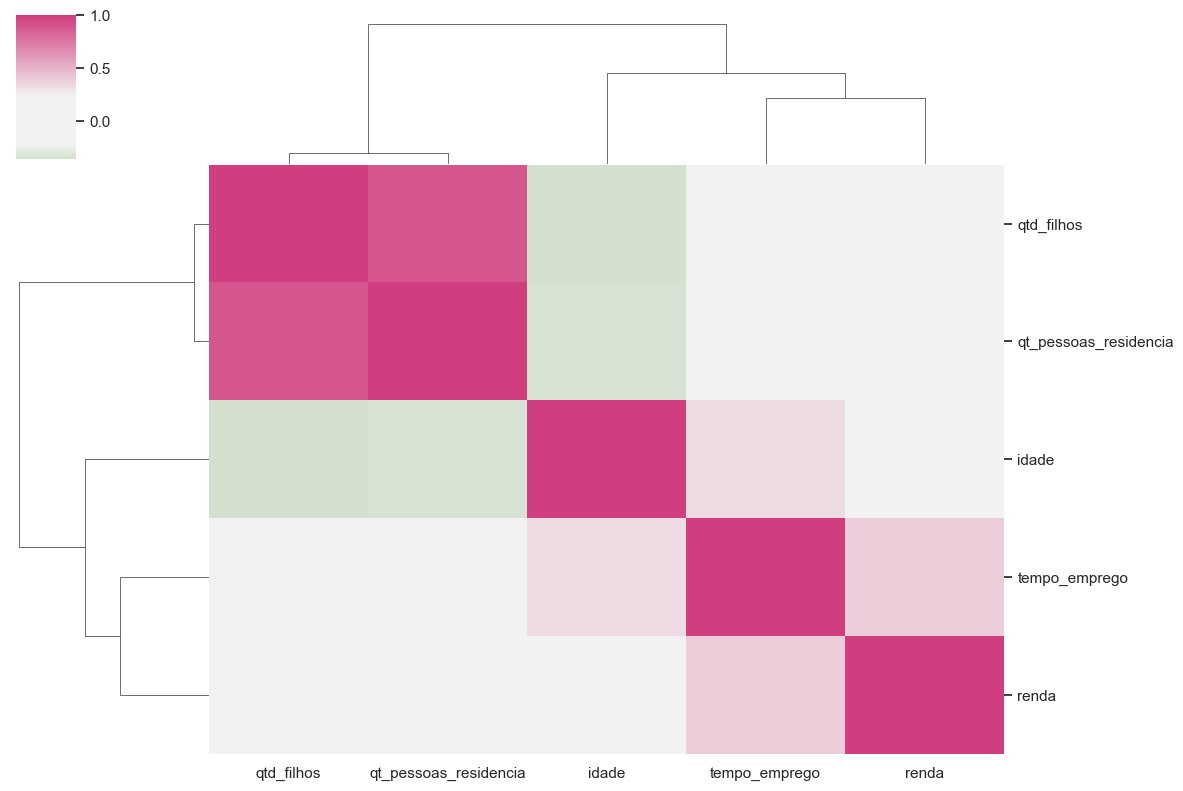

In [40]:
# A visualização da tabela acima fica mais fácil com o clustermap()

corr_matrix = numeric_df.corr(method='pearson', numeric_only=True)

cmap = sns.diverging_palette(h_neg=120, h_pos=350, as_cmap=True, sep=60, center='light')
sns.clustermap(corr_matrix, figsize=[12,8], center=0, cmap=cmap)

### Análise de bivariada

Pela análise da matriz de correlação e do mapa de cluster é possível verificar que a variável resposta, renda, apresenta uma correlação maior com a variável tempo_emprego e um pouco com a posse_de_veiculo.



<Axes: xlabel='posse_de_veiculo', ylabel='renda'>

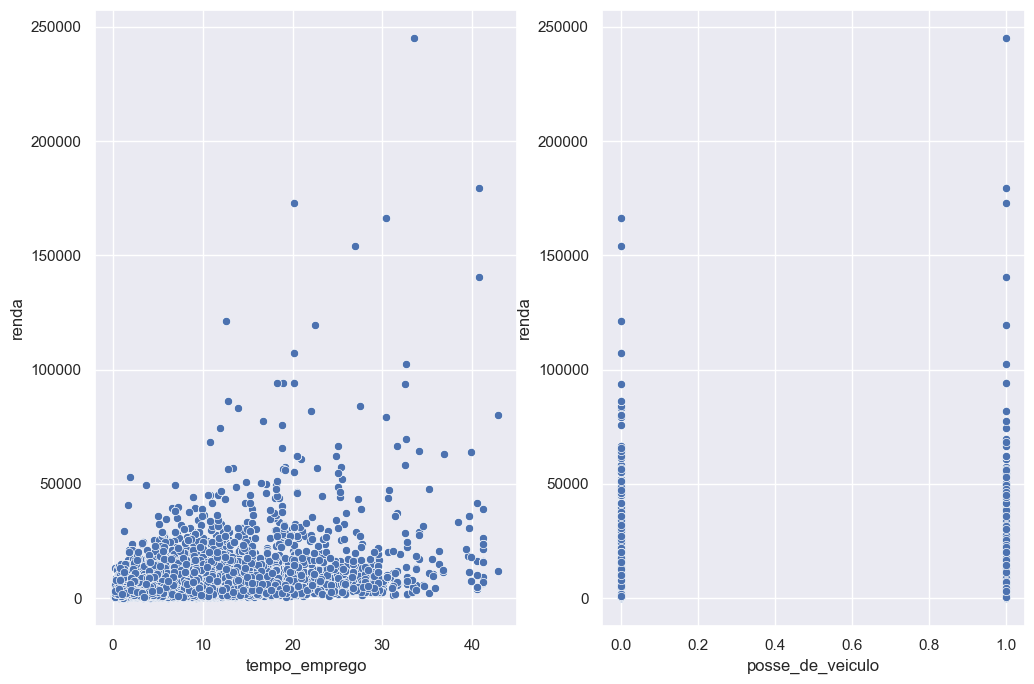

In [41]:
# Para uma melhor visualização será plotado um gráfico de dispersão do tempo_emprego e posse_de_veiculo, ambos em função da renda.

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_1, x='tempo_emprego', y='renda')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_1, x='posse_de_veiculo', y='renda')

Os gráficos de dispersão não evidenciaram uma correlação perceptível entre as variáveis.

In [43]:
#Com a finalidade de melhorar a visualização da interação entre as variáveis vou criar as variáveis, log_renda que é o log da renda e pol_2_renda que é o polinomio de segundo grau de renda

df_1['log_renda'] = np.log(df_1['renda'])
df_1['pol_2_renda'] = np.power(df_1['renda'], 2)

<Axes: xlabel='tempo_emprego', ylabel='pol_2_renda'>

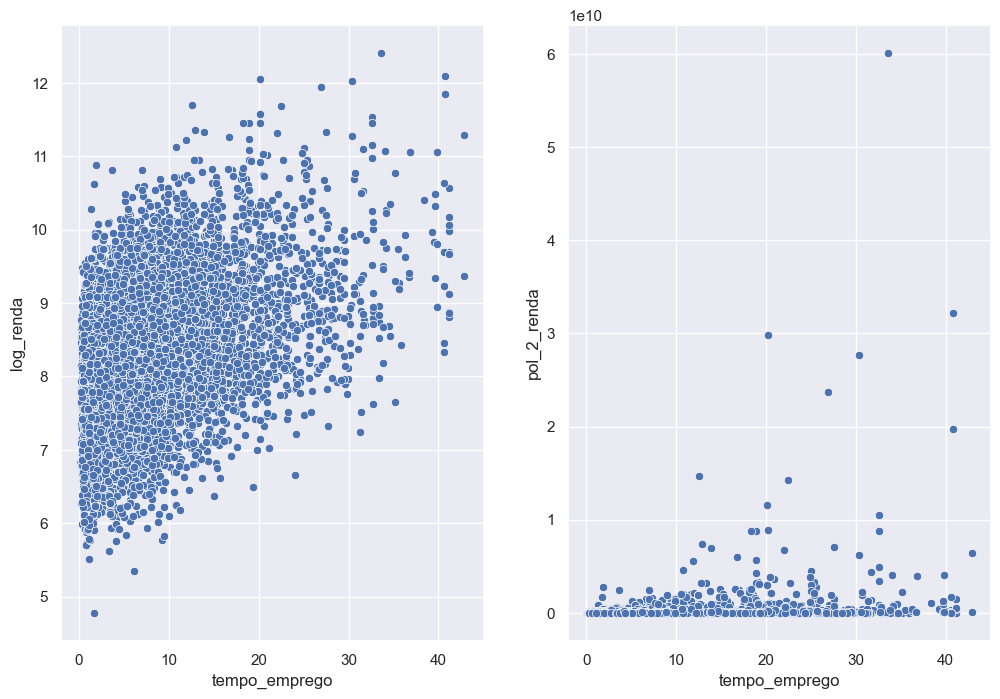

In [44]:
#Plotando novamente os gráficos acima, mas com as variáveis criadas

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_1, x='tempo_emprego', y='log_renda')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_1, x='tempo_emprego', y='pol_2_renda')

In [48]:
df_1.corr(method='pearson', numeric_only=True)

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda,pol_2_renda
posse_de_veiculo,1.000000,-0.014172,0.118690,-0.178903,-0.076155,0.167240,0.100493,0.151478,0.031061
posse_de_imovel,-0.014172,1.000000,-0.022738,0.140510,0.009465,-0.023415,0.003880,0.023777,-0.006382
qtd_filhos,0.118690,-0.022738,1.000000,-0.360426,-0.063220,0.889777,0.029346,0.048858,-0.001061
idade,-0.178903,0.140510,-0.360426,1.000000,0.321573,-0.339320,0.022435,-0.001177,0.031767
tempo_emprego,-0.076155,0.009465,-0.063220,0.321573,1.000000,-0.065670,0.385013,0.413624,0.199255
qt_pessoas_residencia,0.167240,-0.023415,0.889777,-0.339320,-0.065670,1.000000,0.047842,0.066697,0.011743
renda,0.100493,0.003880,0.029346,0.022435,0.385013,0.047842,1.000000,0.733094,0.774632
log_renda,0.151478,0.023777,0.048858,-0.001177,0.413624,0.066697,0.733094,1.000000,0.296425
pol_2_renda,0.031061,-0.006382,-0.001061,0.031767,0.199255,0.011743,0.774632,0.296425,1.000000


Pode-se perceber que realizar a transformação da variável resposta para escala logaritmica elevou o valor da correlação de pearson, o que é muito bom.

### Análise das variáveis qualitativas ao longo do tempo

Aqui será analisado como a renda variou no tempo, em função das demais variáveis explicativas.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '2015-01-01'),
  Text(1, 0, '2015-02-01'),
  Text(2, 0, '2015-03-01'),
  Text(3, 0, '2015-04-01'),
  Text(4, 0, '2015-05-01'),
  Text(5, 0, '2015-06-01'),
  Text(6, 0, '2015-07-01'),
  Text(7, 0, '2015-08-01'),
  Text(8, 0, '2015-09-01'),
  Text(9, 0, '2015-10-01'),
  Text(10, 0, '2015-11-01'),
  Text(11, 0, '2015-12-01'),
  Text(12, 0, '2016-01-01'),
  Text(13, 0, '2016-02-01'),
  Text(14, 0, '2016-03-01')])

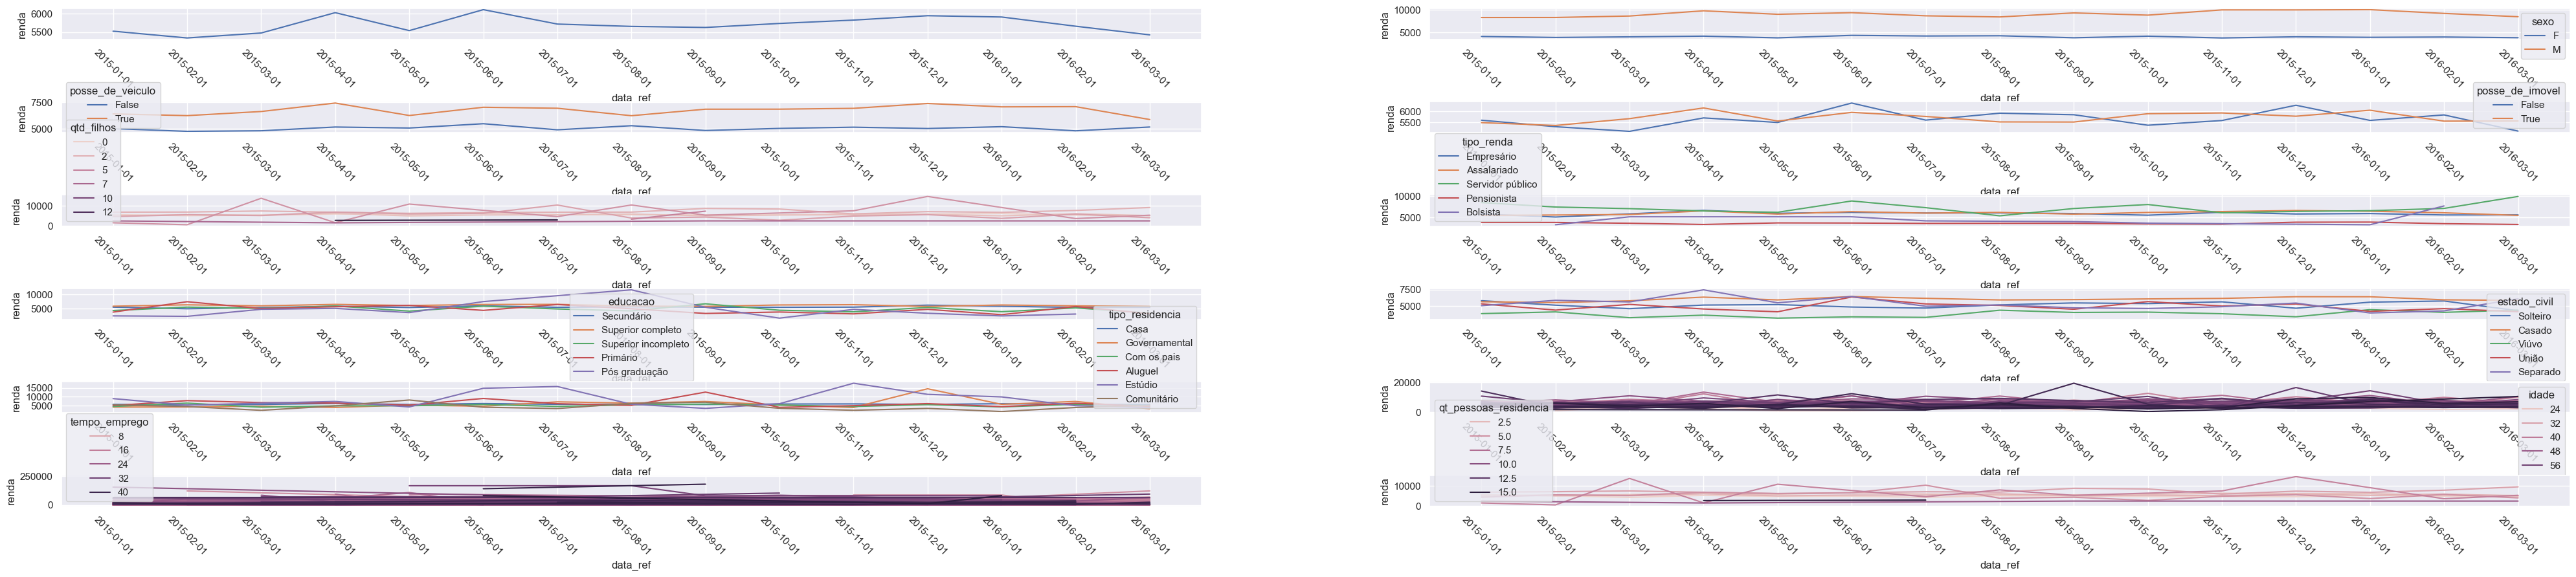

In [49]:
plt.figure(figsize=(50, 10))
plt.subplots_adjust(wspace=0.2, hspace=2)

plt.subplot(6, 2, 1)
sns.lineplot(data=df, x='data_ref', y='renda', errorbar=None)
plt.xticks(rotation=315)

plt.subplot(6, 2, 2)
sns.lineplot(data=df, x='data_ref', y='renda', hue='sexo', errorbar=None)
plt.xticks(rotation=315)

plt.subplot(6, 2, 3)
sns.lineplot(data=df, x='data_ref', y='renda', hue='posse_de_veiculo', errorbar=None)
plt.xticks(rotation=315)

plt.subplot(6, 2, 4)
sns.lineplot(data=df, x='data_ref', y='renda', hue='posse_de_imovel', errorbar=None)
plt.xticks(rotation=315)

plt.subplot(6, 2, 5)
sns.lineplot(data=df, x='data_ref', y='renda', hue='qtd_filhos', errorbar=None)
plt.xticks(rotation=315)

plt.subplot(6, 2, 6)
sns.lineplot(data=df, x='data_ref', y='renda', hue='tipo_renda', errorbar=None)
plt.xticks(rotation=315)

plt.subplot(6, 2, 7)
sns.lineplot(data=df, x='data_ref', y='renda', hue='educacao', errorbar=None)
plt.xticks(rotation=315)

plt.subplot(6, 2, 8)
sns.lineplot(data=df, x='data_ref', y='renda', hue='estado_civil', errorbar=None)
plt.xticks(rotation=315)

plt.subplot(6, 2, 9)
sns.lineplot(data=df, x='data_ref', y='renda', hue='tipo_residencia', errorbar=None)
plt.xticks(rotation=315)

plt.subplot(6, 2, 10)
sns.lineplot(data=df, x='data_ref', y='renda', hue='idade', errorbar=None)
plt.xticks(rotation=315)

plt.subplot(6, 2, 11)
sns.lineplot(data=df, x='data_ref', y='renda', hue='tempo_emprego', errorbar=None)
plt.xticks(rotation=315)

plt.subplot(6, 2, 12)
sns.lineplot(data=df, x='data_ref', y='renda', hue='qt_pessoas_residencia', errorbar=None)
plt.xticks(rotation=315)

Pela análise das bivariadas em função do tempo, a variável sexo e posse_de_veiculo descrevem melhor a renda.

Aparentemente, os clientes homens possuem uma renda maior que as mulheres, e possuir veiculo também aponta uma maior renda.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [50]:
#Para modelagem vou criar uma nova base de dados.

df_modelagem = df.copy()

In [51]:
df_modelagem = (df_modelagem.drop(columns=['data_ref', 'id_cliente']) # Removendo as variáveis id_cliente e data_ref da base de dados
                .dropna() # Como a base de dados é bem extensa eu irei remover as linhsa com dados faltantes da variável tempo_emprego
                .drop_duplicates()) # Remove os dados duplicados da base de dados

In [53]:
#Convetendo as variáveis categóricas em dummies.

df_modelagem = pd.get_dummies(df_modelagem)

In [54]:
#Vou criar também a variável log_renda, que apresentou um bom resultado na análise anterior

df_modelagem['log_renda'] = np.log(df_modelagem['renda'])

In [55]:
df_modelagem.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,tipo_renda_Assalariado,...,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,log_renda
0,False,True,0,26,6.602740,1.0,8060.34,True,False,False,...,True,False,False,False,True,False,False,False,False,8.994711
1,True,True,0,28,7.183562,2.0,1852.15,False,True,True,...,False,False,False,False,True,False,False,False,False,7.524102
2,True,True,0,35,0.838356,2.0,2253.89,True,False,False,...,False,False,False,False,True,False,False,False,False,7.720413
3,False,True,1,30,4.846575,3.0,6600.77,True,False,False,...,False,False,False,False,True,False,False,False,False,8.794942
4,True,False,0,33,4.293151,1.0,6475.97,False,True,True,...,True,False,False,False,False,False,False,False,True,8.775854


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:

- Selecionar a técnica de modelagem

A técnica que será utilizada é a árvore de regressão. Este é um algoritmo bem parecido com as árvores de classificação, mas serve para prever variáveis contínuas. Este modelo pode apresentar diversas profundidades e quanto maior a profundidade mais complexo é o modelo.

- Desenho do teste

Antes de rodar o modelo é preciso construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada treinamento, onde o algoritmo 'aprende', e outra chamada de teste, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo.

- Avaliação do modelo

A avaliação do modelo será realizada através do valor de R², correlação de Pearson. Este parâmetro varia de 0 a 1, quanto mais próximo de 1 melhor o modelo está ajustado para as variáveis. Contudo, um valor de R² muito próximo de 1 pode indicar um overfitting dos dados, portanto é preciso avaliar o resultado do modelo, com atenção.


### Rodando o modelo

Primeiramente devemos separar a variável resposta das variáveis explicativas.

No caso a minha variável resposta será o log da renda, e as demais serão as variáveis explicativas.

In [56]:
#Variável resposta

y = df_modelagem[['log_renda']]

In [57]:
#Vou remover da variável log de renda que é a variável resposta e renda que deu origem ao log de renda

X = df_modelagem.drop(columns=['renda', 'log_renda'])

In [58]:
#Com as variáveis prontas separa-se a base de dados em treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=950609, train_size=0.8)

In [59]:
#Dicionário que armazena o valor da profundidade e do R²

r_2 = {}

#Looping que irá armazenar a profundidade da árvore e o valor de R²

for i in range(1, 40):
    regr = DecisionTreeRegressor(max_depth=i) # Definindo a profunidade da árvore
    regr.fit(X_train, y_train) # Treinando o modelo com as variáveis de treinamento
    mse = regr.score(X_train, y_train) # Obtendo o valor de R²

    r_2[i] = round(mse, 3)

In [60]:
r_2

{1: 0.136,
 2: 0.297,
 3: 0.354,
 4: 0.378,
 5: 0.39,
 6: 0.407,
 7: 0.429,
 8: 0.453,
 9: 0.483,
 10: 0.519,
 11: 0.555,
 12: 0.586,
 13: 0.617,
 14: 0.647,
 15: 0.672,
 16: 0.694,
 17: 0.715,
 18: 0.731,
 19: 0.743,
 20: 0.753,
 21: 0.76,
 22: 0.764,
 23: 0.767,
 24: 0.769,
 25: 0.771,
 26: 0.771,
 27: 0.771,
 28: 0.772,
 29: 0.772,
 30: 0.772,
 31: 0.772,
 32: 0.772,
 33: 0.772,
 34: 0.772,
 35: 0.772,
 36: 0.772,
 37: 0.772,
 38: 0.772,
 39: 0.772}

In [61]:
#A partir da profundidade 28 o valor de R² assume seu valor máximo, 0,772. Esta profundidade será utilizada nos próximos passos da modelagem

regr = DecisionTreeRegressor(max_depth=28) # Definindo a profunidade da árvore
regr.fit(X_train, y_train) # Treinando o modelo com as variáveis de treinamento

DecisionTreeRegressor(max_depth=28)

Com o valor da profunidade da árvore definida é preciso realizar a poda da árvore, para isso será utilizado o método CCP-alfas que pondera a complexidade da árvore.

Esse método serve para controlar o tamanho da árvore.

Valores maiores de ccp_alpha aumenta o número de nós podados.

In [62]:
#Aplicando o método de CCP.

path = regr.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0, 0.5, 'Impureza total das folhas')

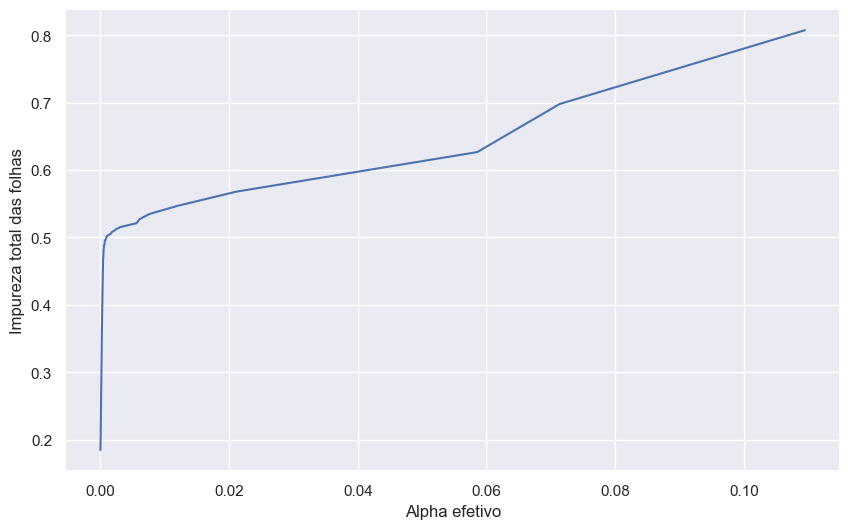

In [63]:
# Plotando s resultados obtidos acima.

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

Agora, para cada valor de alpha será treinado uma árvore


In [67]:
# Lista que irá guardar o ,

clfs = []

# Looping para construir uma nova árvore para cada ccp

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

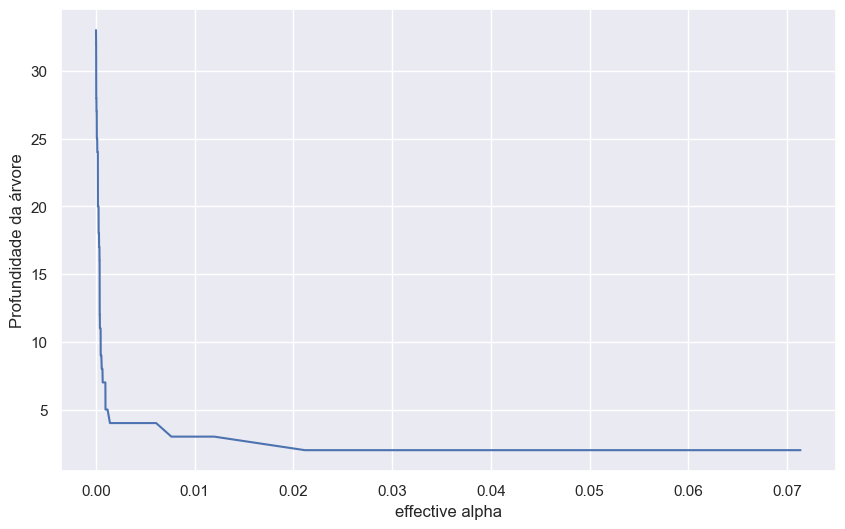

In [69]:
# Plotando a profundidade da árvore pelo valor de alpha effetivo

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

Para cada árvore na lista, calcula-se o MSE da árvore

In [70]:
# MSE para cada alpha (List compreension)

train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

Monta-se um gráfico do MSE pelo alpha. O valor de alpha é escolhido perto do ponto de mínimo do MSE da linha do teste.

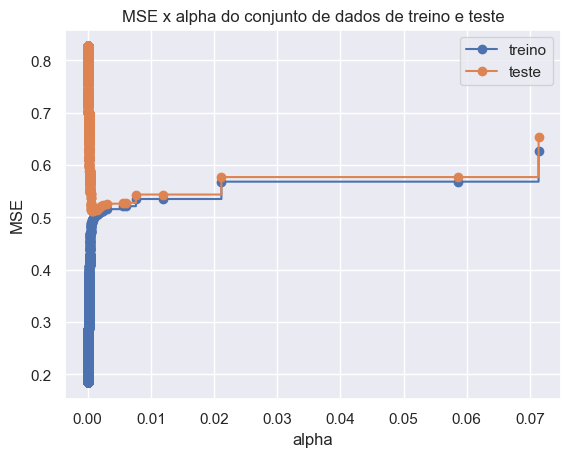

In [71]:
#Plotando o gráfico.

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

O valor que minimiza o MSE está próximo de alpha igual à 0.00125

Em seguida calcula-se o valor de R² utilizando o valor de alpha obtido

In [72]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=0.00125)
arvore_final.fit(X_train, y_train)

print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f'R-quadrado na base de testes: {arvore_final.score(X_test, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}')

Profundidade: 5
R-quadrado na base de testes: 0.36
MSE na base de testes: 0.51


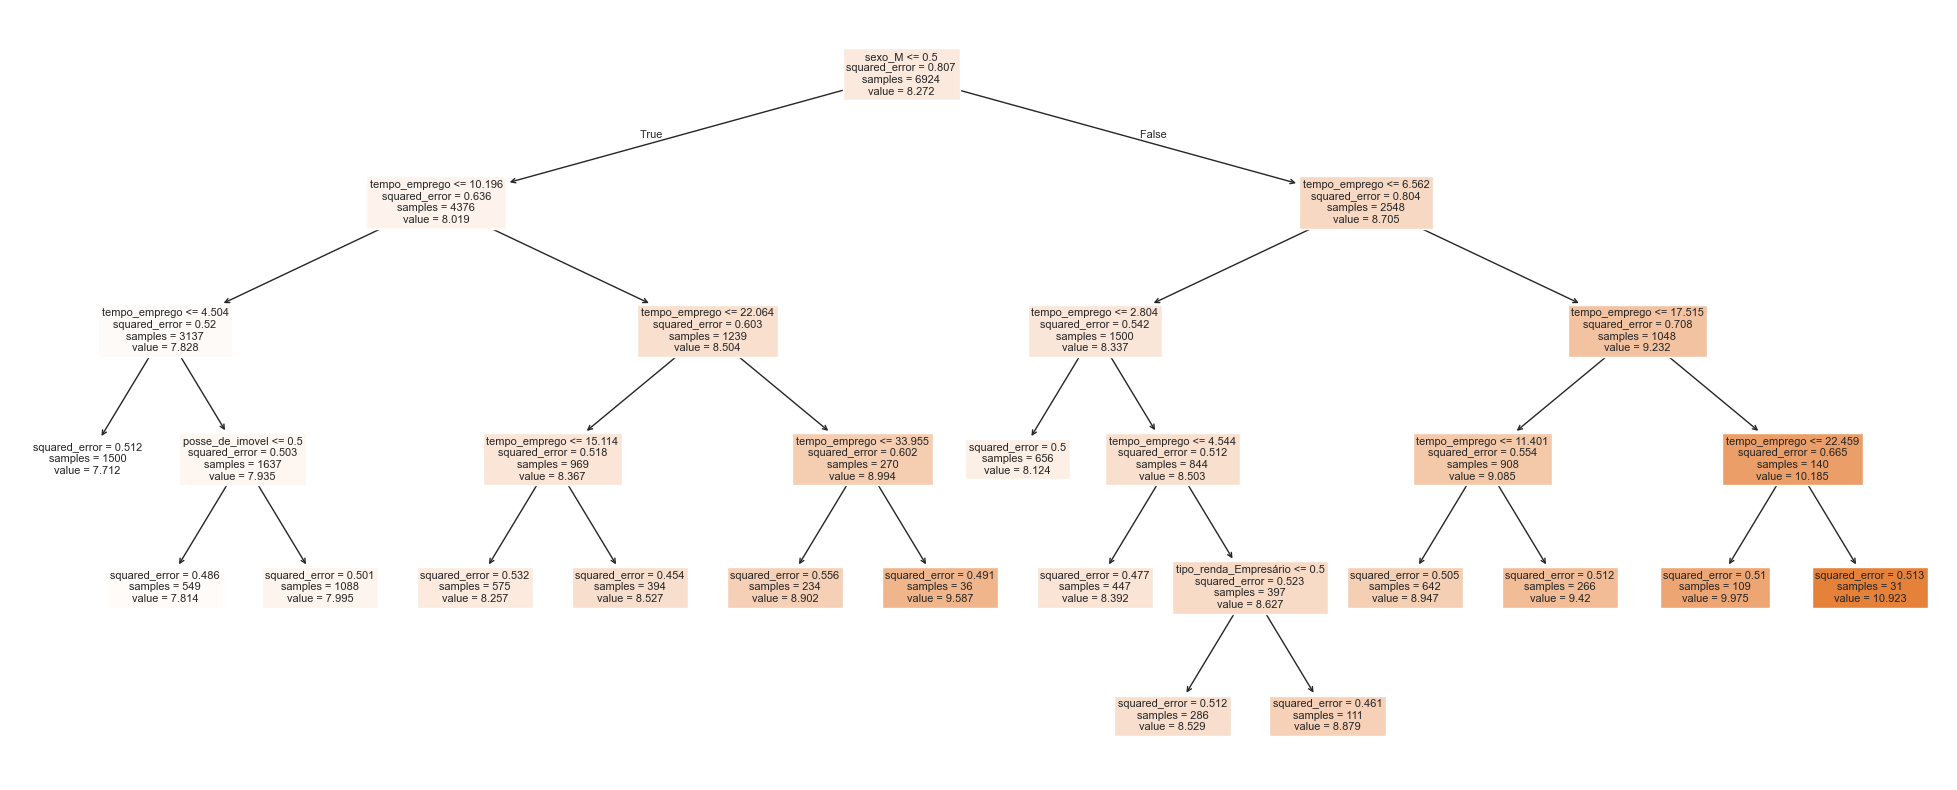

In [73]:
#Visualização da árvore obtida

plt.rc('figure', figsize=(25, 10))
tp = tree.plot_tree(arvore_final,
                    feature_names=X.columns,
                    filled=True)

## Etapa 5 Crisp-DM: Avaliação dos resultados


Como resultado final da árvore de regressão para se prever o valor da renda, o valor de R² obtido foi de 0.36, ou seja, o modelo desenvolvido consegue explicar 0.36% dos dados da base de teste. Este valor não ficou próximo de 1.0 o que indica que não houve overffiting, contudo, também indica que esta modelagem não seja a melhor para realizar a previsão de renda das pessoas.

Para melhorar o resultado talvez fosse possível retirar algumas variáveis do modelo, como por exemplo, o sexo da pessoa, que está no nó raiz, pois teoricamente o valor da renda não deveria estar atrelado ao sexo dos indivíduos.

## Etapa 6 Crisp-DM: Implantação

Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.
Este documento será disponibilizado no Github para ampliação do portfólio